# Adaptive linear neurons and the convergence of learning

## Using the Adaline Neuron

The key difference between Adaline and the perceptron is that Rosenblatt's perceptron updates weights based on a linear activation function rather than a unit step function like the perceptron.  

In adaline, the linear activation function is the identify function so \phi(w^tx) = w^tx

Linear actiivation function is used for learning weights, a quantizer (similar to the unit step function) is used to predict classes. Allows us to use the linear activation fucntion to computethe model error and update the weights rather than binary class labels

An objective function is a function that is to be optimized during the learning process. It is often a cost function that we want to minimize. In the case of adaline, we use the Sum of squred errors as the cost function (scaled by .5 to help derive the gradient). 

This cost function is differentiable and convex-- can use gradient descent to find weights that minimize the cost.

### Implementation

Very similar to the perceptron rule, just with a different fit method

In [10]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ---------
        self: object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate net input"""""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


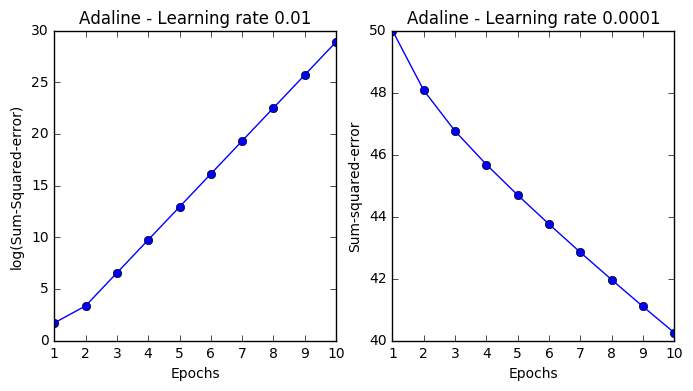

In [31]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))
ada1 =  AdalineGD(n_iter=10, eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Standardizing the features to help gradient descent

In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

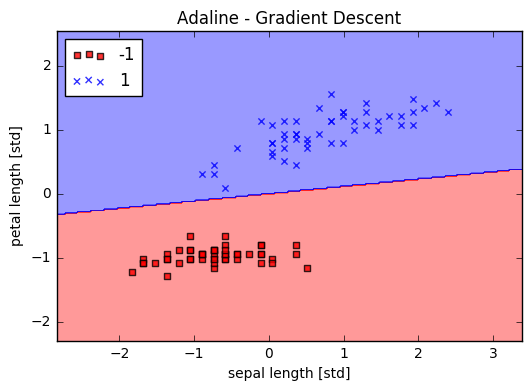

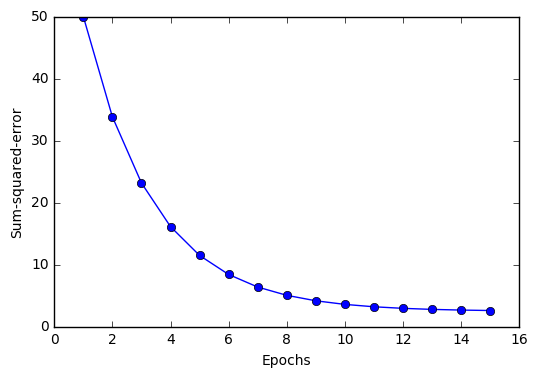

In [32]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier= ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1,len(ada.cost_) +1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [8]:
# From the perceptron part of the chapter
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [35]:
ada.w_

array([  1.56541446e-16,  -1.26256159e-01,   1.10479201e+00])

### Aside: Logistic Regression

As a brief aside, I was curious if this was just a fancier way of doing a logistic regression. Below are the results of a quick and dirty attempt via the statsmodel package. Granted there are some structural differences in how the problem is set up (i.e., the outcome is -1/1 as a neuron and 0/1 for logistic regression) and there doesn't appear to be the need for a logistic transformation for the neuron, however what is possibly the most prominent difference is that the machine learning algorithm can accomodate perfect separation (in fact, that's what it is searching for) whereas the logistic model cannot accomodate such perfect linear boundaries as evidenced by the error below. 

In [36]:
import statsmodels.api as sm

In [48]:
model = sm.Logit(ybin, X_std).fit()
model.summary()

         Current function value: inf
         Iterations: 35


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1213: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1263: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [44]:
ybin = np.where(y == -1, 0, 1)
ybin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

### Using stochastic gradient descent for the Adaline perceptron

Will update the weights after each training sample
Implement an additional partial_fit method that does not reinitialize the weights for online learning. 
Cost will be calculated as the average cost of the training samplesin each epoch. 
Add shuffle method to avoid optimizing the cost function

In [28]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle: bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
    
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number ofeatures.
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ---------
        self: object
        """
    
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing weights"""
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initalized = True 
    
    def _update_weights(self, xi, target):
        """Apply adaline learning rule to update weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2 
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

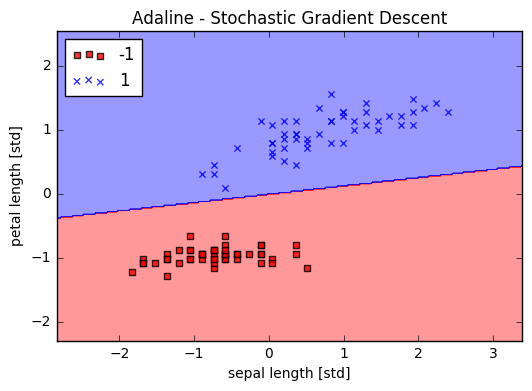

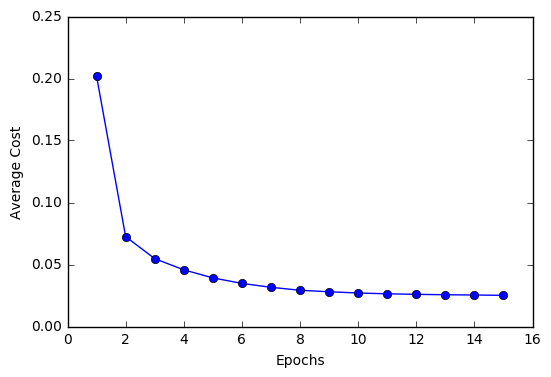

In [29]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state = 1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

To update model with online learning, we could call partial_fit method on individal sample

In [30]:
ada.partial_fit(X_std[0, :], y[0])

IndexError: tuple index out of range